In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('bert_embeddings_small.csv')

In [3]:
orig_data = df_data.values

In [4]:
n_components = 10
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(orig_data)

In [5]:
data_reconstructed = pca.inverse_transform(data_pca)

In [6]:
def mse(x, y):
    return np.mean((x - y) ** 2)

def plot_array(data):
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.plot(data)  # Plot the data
    plt.title('Data Plot')  # Set the title of the plot
    plt.xlabel('Index')  # Set the x-axis label
    plt.ylabel('Value')  # Set the y-axis label
    plt.grid(True)  # Show grid
    plt.show()  # Display the plot
    
total_mse = 0
for i in tqdm(range(len(orig_data))):
    total_mse += mse(orig_data[i], data_reconstructed[i])
total_mse

100%|███████████████████████████████████████████████████████████████████████| 181321/181321 [00:00<00:00, 203503.78it/s]


19827.242162487193

In [7]:
errors = []
for i in tqdm(range(100)):
    pca = PCA(n_components=i+5)
    data_pca = pca.fit_transform(orig_data)
    data_reconstructed = pca.inverse_transform(data_pca)
    total_mse = 0
    for i in (range(len(orig_data))):
        total_mse += mse(orig_data[i], data_reconstructed[i])
    errors.append(total_mse)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [07:25<00:00,  4.46s/it]


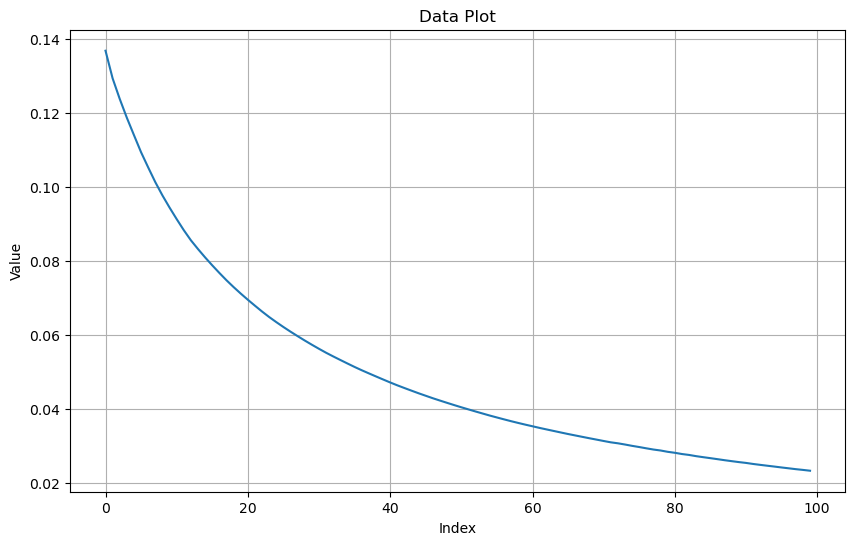

In [8]:
scaled_errors = np.array(errors) / len(orig_data)
plot_array(scaled_errors)

SyntaxError: invalid syntax (796671574.py, line 1)